In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from gplearn.genetic import SymbolicRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score, classification_report, max_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ('ignore')
import seaborn as sns
#adjusted r2 formula

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
def calculate_adj_r2(r_sq, n, k):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

In [5]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("D:\\ds\\auto-mpg.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name' ]
Y = ['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)



Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
2682
900


In [12]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,34.193467,2970.424623,15.568090,76.010050,1.572864,135.776382
std,7.815984,1.701004,104.269838,24.397738,846.841774,2.757689,3.697627,0.802055,89.114382
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,14.000000,2223.750000,13.825000,73.000000,1.000000,55.250000
50%,23.000000,4.000000,148.500000,28.000000,2803.500000,15.500000,76.000000,1.000000,128.500000
75%,29.000000,8.000000,262.000000,53.000000,3608.000000,17.175000,79.000000,2.000000,211.750000
max,46.600000,8.000000,455.000000,93.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


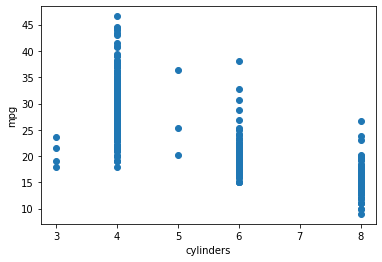

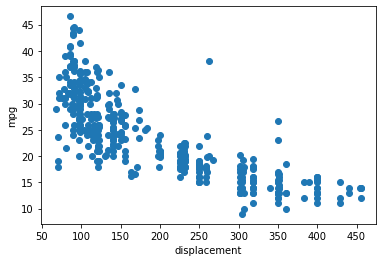

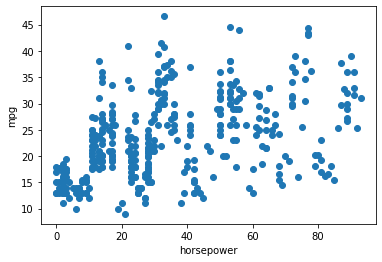

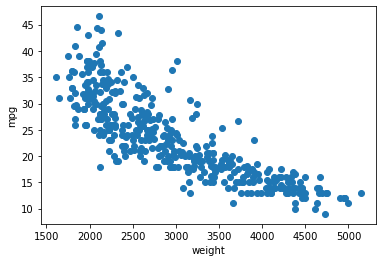

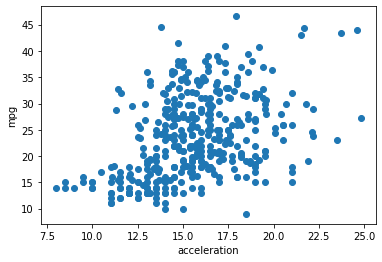

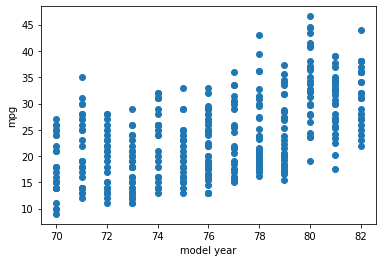

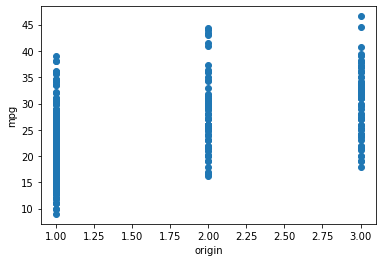

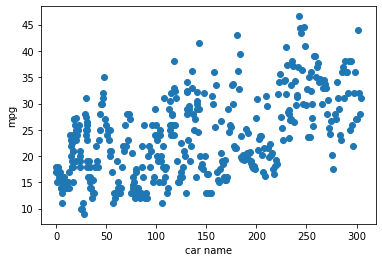

In [6]:
for i in X:
    plt.scatter(x=data[i], y=data[Y])
    plt.xlabel(i)
    plt.ylabel(Y[0])
    plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-20 17:33:15] Features: 1/8 -- score: 0.6716128029565731[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-20 17:33:15] Features: 2/8 -- score: 0.7947123435236452[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-20 17:33:15] Features: 3/8 -- score: 0.8016951001447611[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

                feature_idx  \
1                      (3,)   
2                    (3, 5)   
3                 (3, 5, 6)   
4              (3, 5, 6, 7)   
5           (0, 3, 5, 6, 7)   
6        (0, 3, 4, 5, 6, 7)   
7     (0, 1, 3, 4, 5, 6, 7)   
8  (0, 1, 2, 3, 4, 5, 6, 7)   

                                           cv_scores avg_score  \
1  [0.6650693023062961, 0.6445742886755507, 0.689...  0.671613   
2  [0.8191235813490513, 0.7753747031085079, 0.789...  0.794712   
3  [0.8173740710898953, 0.7973197386084644, 0.806...  0.801695   
4  [0.8163515623936648, 0.7989645441426639, 0.807...  0.801303   
5  [0.8165560683186123, 0.7987575135757666, 0.807...  0.800382   
6  [0.8109765706691161, 0.8010863484628207, 0.809...  0.799079   
7  [0.813472838084199, 0.7983604985649788, 0.8113...  0.797949   
8  [0.8031182534359832, 0.7963233192521901, 0.811...  0.792756   

                                       feature_names  ci_bound   std_dev  \
1                                          (weigh

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-20 17:33:15] Features: 7/8 -- score: 0.7979491872540632[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-20 17:33:15] Features: 8/8 -- score: 0.7927561093693065

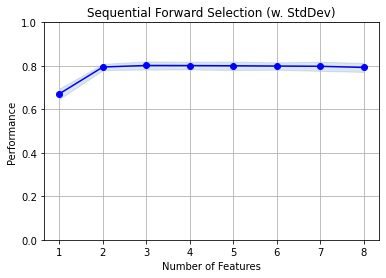

In [14]:
regr = LinearRegression()


#Forward Selection
sfs_f = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)
sfs_f.fit(df_train[X], df_train[Y])
print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

fig1 = plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [16]:
print('\nSequential Forward Selection best:')
print(sfs_f.k_feature_idx_)
print('CV Score:')
print(sfs_f.k_score_)
print(sfs1.k_feature_names_)


Sequential Forward Selection best:
(3, 5, 6)
CV Score:
0.8016951001447611
('weight', 'model year', 'origin')


In [8]:
#BackWard Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-02-20 17:29:14] Features: 7/1 -- score: -2.656641743487083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 6/1 -- score: -2.636291458429473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 5/1 -- score: -2.62848473515149[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

                feature_idx  \
8  (0, 1, 2, 3, 4, 5, 6, 7)   
7     (0, 1, 3, 4, 5, 6, 7)   
6        (0, 1, 3, 5, 6, 7)   
5           (0, 3, 5, 6, 7)   
4              (3, 5, 6, 7)   
3                 (3, 5, 6)   
2                    (3, 5)   
1                      (3,)   

                                           cv_scores avg_score  \
8  [-2.666462249687211, -2.424736325039902, -2.77... -2.699093   
7  [-2.580378821322247, -2.4165204666185085, -2.7... -2.656642   
6  [-2.533546593410863, -2.4475533905080953, -2.7... -2.636291   
5  [-2.535874799793527, -2.4604895789590957, -2.7... -2.628485   
4  [-2.5375418373310983, -2.443777386456624, -2.7... -2.616764   
3  [-2.522993628712962, -2.448584761729632, -2.77... -2.622611   
2  [-2.5609976552815725, -2.607557102116329, -2.9... -2.721083   
1  [-3.476020109793365, -3.1540777267216957, -3.6... -3.358174   

                                       feature_names  ci_bound   std_dev  \
8  (cylinders, displacement, horsepower, weight, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 4/1 -- score: -2.6167635559602562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 3/1 -- score: -2.622610580054023[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 2/1 -- score: -2.7210826204925906[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-20 17:29:15] Features: 1/1 -- 

In [9]:
#StepWise Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-20 17:29:24] Features: 1/8 -- score: -3.3581739953598535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-20 17:29:24] Features: 2/8 -- score: -2.7210826204925906[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

                feature_idx  \
1                      (3,)   
2                    (3, 5)   
3                 (3, 5, 6)   
4              (3, 5, 6, 7)   
5           (0, 3, 5, 6, 7)   
6        (0, 1, 3, 5, 6, 7)   
7     (0, 1, 3, 4, 5, 6, 7)   
8  (0, 1, 2, 3, 4, 5, 6, 7)   

                                           cv_scores avg_score  \
1  [-3.476020109793365, -3.1540777267216957, -3.6... -3.358174   
2  [-2.5609976552815725, -2.607557102116329, -2.9... -2.721083   
3  [-2.522993628712962, -2.448584761729632, -2.77... -2.622611   
4  [-2.5375418373310983, -2.443777386456624, -2.7... -2.616764   
5  [-2.535874799793527, -2.4604895789590957, -2.7... -2.628485   
6  [-2.533546593410863, -2.4475533905080953, -2.7... -2.636291   
7  [-2.580378821322247, -2.4165204666185085, -2.7... -2.656642   
8  [-2.666462249687211, -2.424736325039902, -2.77... -2.699093   

                                       feature_names  ci_bound   std_dev  \
1                                          (weigh

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-20 17:29:25] Features: 8/8 -- score: -2.69909252990401

In [17]:
X=['weight', 'model year', 'origin']
Y = ['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)

1192
400


In [18]:

 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)
Y_Pred= lin2.predict(poly.fit_transform(X_test))
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
print(max_error(Y_test, Y_Pred))





R2 0.8857505723869155
Adj R2 0.8821802777740065
8.519434954376095


In [19]:
linear_regr = LinearRegression().fit(X_train, Y_train)

Y_Pred= linear_regr.predict(X_test)


x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


scores = cross_val_score(linear_regr, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


R2 0.8350774853140814
Adj R2 0.8299236567301465
Folds: 10, MSE: 0.800859445012397, STD: 0.057176675119957936


Best Alpha 0.9899999999999995
R2 0.8351387384635716
Adj R2 0.8299868240405581
[0.84652425 0.84652423 0.84652422 0.84652421 0.8465242  0.84652418
 0.84652416 0.84652415 0.84652413 0.84652411 0.84652409 0.84652407
 0.84652405 0.84652402 0.846524   0.84652397 0.84652395 0.84652392
 0.84652389 0.84652386 0.84652383 0.8465238  0.84652377 0.84652373
 0.8465237  0.84652367 0.84652363 0.84652359 0.84652355 0.84652351
 0.84652347 0.84652343 0.84652339 0.84652335 0.8465233  0.84652326
 0.84652321 0.84652316 0.84652312 0.84652307 0.84652302 0.84652297
 0.84652291 0.84652286 0.84652281 0.84652275 0.8465227  0.84652264
 0.84652258 0.84652252 0.84652247 0.8465224  0.84652234 0.84652228
 0.84652222 0.84652215 0.84652209 0.84652202 0.84652196 0.84652189
 0.84652182 0.84652175 0.84652168 0.84652161 0.84652153 0.84652146
 0.84652139 0.84652131 0.84652123 0.84652116 0.84652108 0.846521
 0.84652092 0.84652084 0.84652076 0.84652067 0.84652059 0.84652051
 0.84652042 0.84652033 0.84652025 0.84652016 0.846520

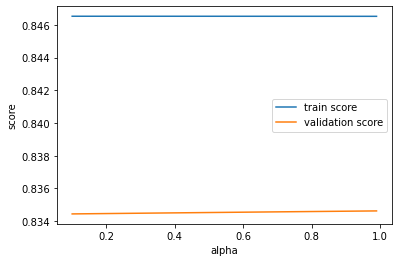

In [20]:
#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train, Y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha", model_cv.alpha_)

Y_Pred=model_cv.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
# scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
#  n_jobs=1)

# print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

train_scores, valid_scores = validation_curve(
 Ridge(), X_test, Y_test, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
print(train_scores_mean)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()


R2 0.8351393461798071
Adj R2 0.8299874507479261
[0.81177323 0.81177323 0.81177322 0.81177322 0.81177322 0.81177321
 0.81177321 0.81177321 0.8117732  0.8117732  0.81177319 0.81177319
 0.81177319 0.81177318 0.81177318 0.81177317 0.81177316 0.81177316
 0.81177315 0.81177315 0.81177314 0.81177313 0.81177313 0.81177312
 0.81177311 0.8117731  0.8117731  0.81177309 0.81177308 0.81177307
 0.81177306 0.81177305 0.81177304 0.81177303 0.81177302 0.81177301
 0.811773   0.81177299 0.81177298 0.81177297 0.81177296 0.81177295
 0.81177294 0.81177293 0.81177292 0.8117729  0.81177289 0.81177288
 0.81177287 0.81177285 0.81177284 0.81177283 0.81177281 0.8117728
 0.81177279 0.81177277 0.81177276 0.81177274 0.81177273 0.81177271
 0.8117727  0.81177268 0.81177267 0.81177265 0.81177263 0.81177262
 0.8117726  0.81177258 0.81177257 0.81177255 0.81177253 0.81177251
 0.8117725  0.81177248 0.81177246 0.81177244 0.81177242 0.8117724
 0.81177238 0.81177237 0.81177235 0.81177233 0.81177231 0.81177229
 0.81177227 0.81

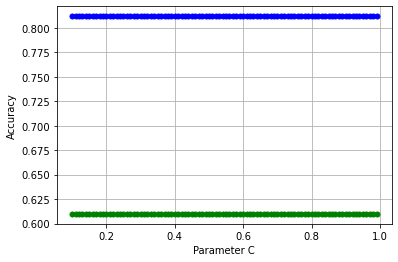

In [21]:
model = Ridge()
model.fit(X_train, Y_train)
Y_Pred=model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

train_scores, _ = validation_curve(model,
                                             X=X_train, y=Y_train,
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#

_, test_scores = validation_curve(model,
                                             X=data[X], y=data[Y],
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
print(train_mean)
plt.plot(np.arange(.1, 1,0.01), train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(np.arange(.1, 1,0.01), test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, Y_train)
score_gp = est_gp.score(X_train, Y_train)
print(score_gp)
Y_Pred=est_gp.predict(X_test)
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.42      2.86478e+26       25          5.36218          5.45975     36.62s
   1    19.01       6.9813e+15       13          4.75148          5.44457     24.19s
   2    24.18       7.2359e+08       17          2.49363          1.91404     21.41s
   3    20.46      3.90249e+06       17          2.37674           2.9582     18.94s
   4    23.43      1.37264e+10       17           2.4177          2.59232     16.36s
   5    22.82      8.24443e+08       19          2.25053          2.11364     12.69s
   6    21.05      2.22082e+09       23          2.17113          3.17656      9.54s
   7    19.29      1.52932e+09       19          2.13066          3.18446      6.82s
   8    18.05      4.87698e+08       21           2.1114          3.51407  

In [23]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_Pred=lasso_model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


R2 0.8341870182234833
Adj R2 0.8290053625429672


In [24]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train, Y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, Y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

5.422754488536554
R2 0.810882236598091
Adj R2 0.8049723064917813
